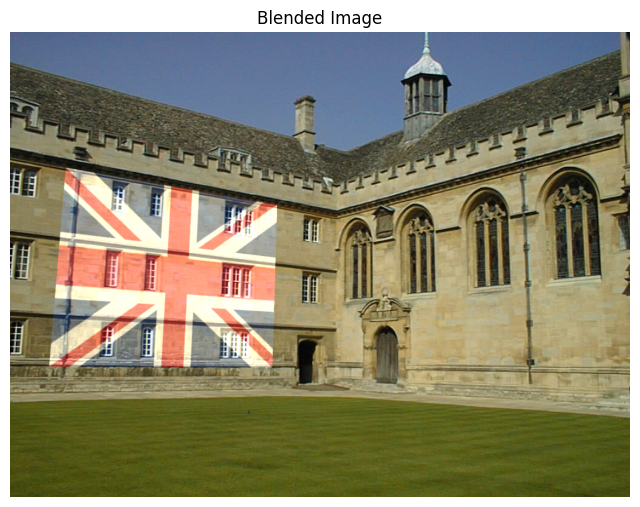

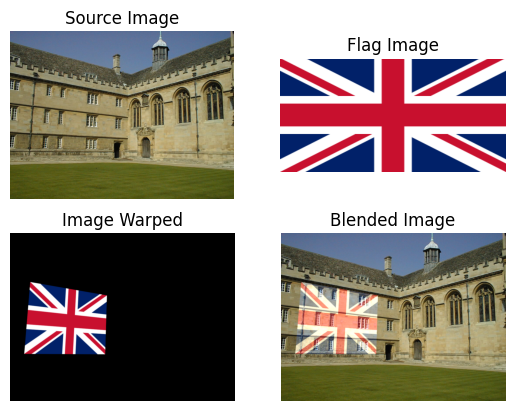

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Constants
NUM_POINTS = 4

# Global variable
global point_index
point_index = 0


# Initialize arrays to store mouse points
base_points = np.empty((NUM_POINTS, 2))
flag_points = np.empty((NUM_POINTS, 2))

# Callback function for mouse events
def record_mouse_points(event, x, y, flags, param):
    global point_index
    points, image = param
    if event == cv.EVENT_LBUTTONDOWN and point_index < NUM_POINTS:
        cv.circle(image, (x, y), 5, (255, 0, 0), -1)
        points[point_index] = (x, y)
        point_index += 1

# Load images and create copies
base_image = cv.imread('Images for Q3/Bunglow.jpg', cv.IMREAD_COLOR)
flag_image = cv.imread('Images for Q3/UK_flag.png', cv.IMREAD_COLOR)
base_image_copy = base_image.copy()
flag_image_copy = flag_image.copy()


# Create windows and set mouse callbacks
cv.namedWindow('Base Image', cv.WINDOW_AUTOSIZE)

cv.setMouseCallback('Base Image', record_mouse_points, (base_points, base_image_copy))

# Collect mouse points for the base image
while True:
    cv.imshow('Base Image', base_image_copy)
    if point_index == NUM_POINTS:
        break
    key = cv.waitKey(20)
    if key & 0xFF == 27:
        break

# Reset point_index for collecting mouse points for the flag image
point_index = 0    
cv.namedWindow('Flag Image', cv.WINDOW_AUTOSIZE)

cv.setMouseCallback('Flag Image', record_mouse_points, (flag_points, flag_image_copy))




# Collect mouse points for the flag image
while True:
    cv.imshow('Flag Image', flag_image_copy)
    if point_index == NUM_POINTS:
        break
    key = cv.waitKey(20)
    if key & 0xFF == 27:
        break

cv.destroyAllWindows()

# Calculate homography between base image and flag
homography, status = cv.findHomography(base_points, flag_points)

# Warp the flag image
warped_flag = cv.warpPerspective(flag_image, np.linalg.inv(homography), (base_image.shape[1], base_image.shape[0]))

# Blending
alpha = 1
beta = 0.5
blended_image = cv.addWeighted(base_image, alpha, warped_flag, beta, 0.0)

# Display the blended image
plt.figure(figsize=(8, 8))
plt.imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
plt.title("Blended Image")
plt.axis("off")

# Display the results in a 2x2 grid

fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(cv.cvtColor(base_image, cv.COLOR_BGR2RGB))
ax[0][0].set_title("Source Image")
ax[0][0].axis("off")


ax[0][1].imshow(cv.cvtColor(flag_image, cv.COLOR_BGR2RGB))
ax[0][1].set_title("Flag Image")
ax[0][1].axis("off")

ax[1][0].imshow(cv.cvtColor(warped_flag, cv.COLOR_BGR2RGB))
ax[1][0].set_title("Image Warped")
ax[1][0].axis("off")

ax[1][1].imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
ax[1][1].set_title("Blended Image")
ax[1][1].axis("off")



plt.show()


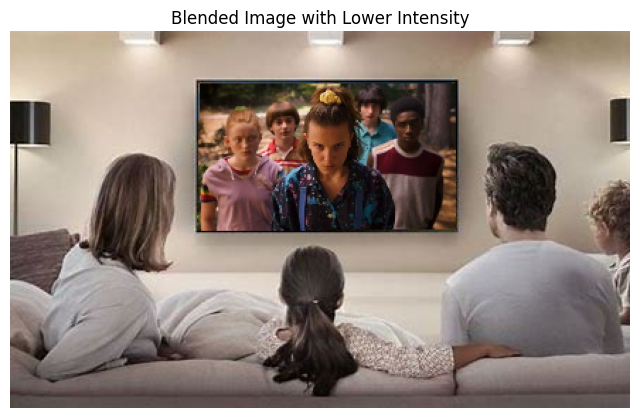

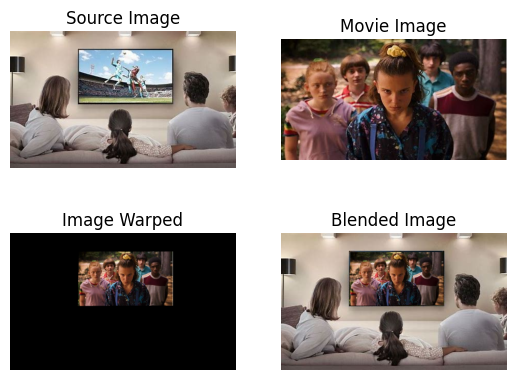

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Constants
NUM_POINTS = 4

# Global variable
global point_index
point_index = 0

# Initialize arrays to store mouse points
base_points = np.empty((NUM_POINTS, 2))
movie_points = np.empty((NUM_POINTS, 2))

# Callback function for mouse events
def record_mouse_points(event, x, y, flags, param):
    global point_index
    points, image = param
    if event == cv.EVENT_LBUTTONDOWN and point_index < NUM_POINTS:
        cv.circle(image, (x, y), 5, (255, 0, 0), -1)
        points[point_index] = (x, y)
        point_index += 1

# Load images and create copies
base_image = cv.imread('Images for Q3/TV look.jpeg', cv.IMREAD_COLOR)
movie_image = cv.imread('Images for Q3/TV.jpeg', cv.IMREAD_COLOR)
base_image_copy = base_image.copy()
movie_image_copy = movie_image.copy()

# Create windows and set mouse callbacks
cv.namedWindow('Base Image', cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Base Image', record_mouse_points, (base_points, base_image_copy))

# Collect mouse points for the base image
while True:
    cv.imshow('Base Image', base_image_copy)
    if point_index == NUM_POINTS:
        break
    key = cv.waitKey(20)
    if key & 0xFF == 27:
        break

# Reset point_index for collecting mouse points for the movie image
point_index = 0
cv.namedWindow('Movie Image', cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Movie Image', record_mouse_points, (movie_points, movie_image_copy))

# Collect mouse points for the movie image
while True:
    cv.imshow('Movie Image', movie_image_copy)
    if point_index == NUM_POINTS:
        break
    key = cv.waitKey(20)
    if key & 0xFF == 27:
        break

cv.destroyAllWindows()

# Calculate homography between base image and movie
homography, status = cv.findHomography(base_points, movie_points)

# Warp the movie image
warped_movie = cv.warpPerspective(movie_image, np.linalg.inv(homography), (base_image.shape[1], base_image.shape[0]))

# Create a mask for the selected region
mask = np.zeros_like(base_image)
cv.fillConvexPoly(mask, base_points.astype(int), (1, 1, 1))  # Fill the selected region with white (1, 1, 1)

# Define a lower intensity for the selected region
lower_intensity = 1  # Adjust this value as needed

# Adjust the intensity of the selected region in the blended image
blended_image = base_image * (1 - mask) + (warped_movie * mask * lower_intensity).astype(np.uint8)

# Display the blended image
plt.figure(figsize=(8, 8))
plt.imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
plt.title("Blended Image with Lower Intensity")
plt.axis("off")

# Display the results
fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(cv.cvtColor(base_image, cv.COLOR_BGR2RGB))
ax[0][0].set_title("Source Image")
ax[0][0].axis("off")

ax[0][1].imshow(cv.cvtColor(movie_image, cv.COLOR_BGR2RGB))
ax[0][1].set_title("Movie Image")
ax[0][1].axis("off")

ax[1][0].imshow(cv.cvtColor(warped_movie, cv.COLOR_BGR2RGB))
ax[1][0].set_title("Image Warped")
ax[1][0].axis("off")

ax[1][1].imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
ax[1][1].set_title("Blended Image")
ax[1][1].axis("off")

plt.show()


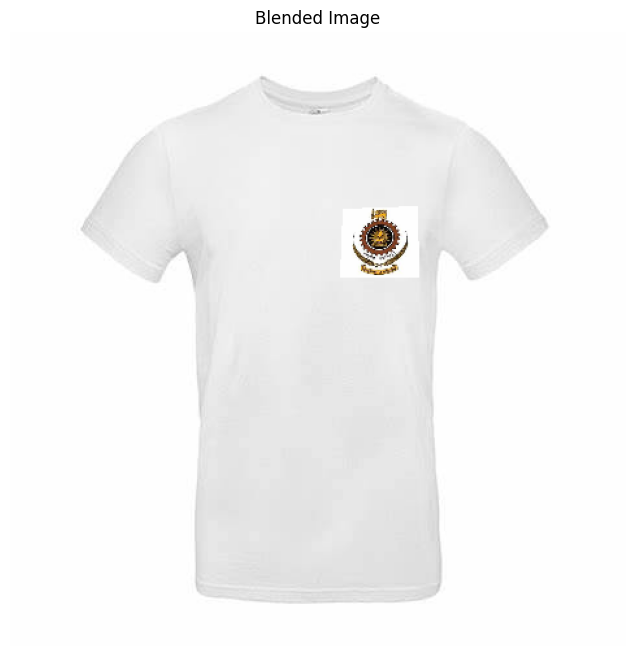

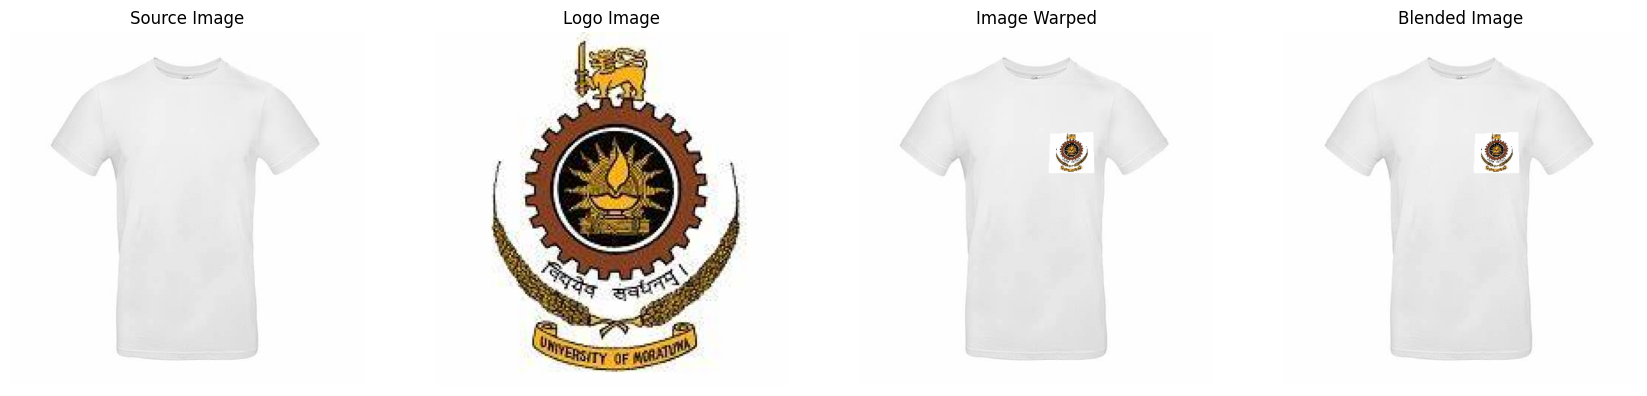

In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Constants
NUM_POINTS = 4

# Global variable
global point_index
point_index = 0

# Initialize arrays to store mouse points
base_points = np.empty((NUM_POINTS, 2))
logo_points = np.empty((NUM_POINTS, 2))

# Callback function for mouse events
def record_mouse_points(event, x, y, flags, param):
    global point_index
    points, image = param
    if event == cv.EVENT_LBUTTONDOWN and point_index < NUM_POINTS:
        cv.circle(image, (x, y), 5, (255, 0, 0), -1)
        points[point_index] = (x, y)
        point_index += 1

# Load images and create copies
base_image = cv.imread('Images for Q3/Tshirt.jpeg', cv.IMREAD_COLOR)
logo_image = cv.imread('Images for Q3/Logo.jpeg', cv.IMREAD_COLOR)
base_image_copy = base_image.copy()
logo_image_copy = logo_image.copy()

# Create windows and set mouse callbacks
cv.namedWindow('Base Image', cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Base Image', record_mouse_points, (base_points, base_image_copy))

# Collect mouse points for the base image
while True:
    cv.imshow('Base Image', base_image_copy)
    if point_index == NUM_POINTS:
        break
    key = cv.waitKey(20)
    if key & 0xFF == 27:
        break

# Reset point_index for collecting mouse points for the logo image
point_index = 0
cv.namedWindow('Logo Image', cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Logo Image', record_mouse_points, (logo_points, logo_image_copy))

# Collect mouse points for the logo image
while True:
    cv.imshow('Logo Image', logo_image_copy)
    if point_index == NUM_POINTS:
        break
    key = cv.waitKey(20)
    if key & 0xFF == 27:
        break

cv.destroyAllWindows()

# Calculate homography between base image and logo
homography, status = cv.findHomography(base_points, logo_points)

# Warp the logo image
warped_logo = cv.warpPerspective(logo_image, np.linalg.inv(homography), (base_image.shape[1], base_image.shape[0]))

# Create a mask for the selected region
mask = np.zeros_like(base_image)
cv.fillConvexPoly(mask, base_points.astype(int), (1, 1, 1))  # Fill the selected region with white (1, 1, 1)

# Define a lower intensity for the selected region
lower_intensity = 1  # Adjust this value as needed

# Adjust the intensity of the selected region in the blended image
blended_image = base_image * (1 - mask) + (warped_logo * mask * lower_intensity).astype(np.uint8)

# Display the blended image
plt.figure(figsize=(8, 8))
plt.imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
plt.title("Blended Image")
plt.axis("off")

# Display the results
fig, ax = plt.subplots(1, 4, figsize=(21, 7))
ax[0].imshow(cv.cvtColor(base_image, cv.COLOR_BGR2RGB))
ax[0].set_title("Source Image")
ax[0].axis("off")
ax[1].imshow(cv.cvtColor(logo_image, cv.COLOR_BGR2RGB))
ax[1].set_title("Logo Image")
ax[1].axis("off")
ax[2].imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
ax[2].set_title("Image Warped")
ax[2].axis("off")
ax[3].imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
ax[3].set_title("Blended Image")
ax[3].axis("off")


plt.show()
